<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Inventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EJERCICIO 5.5
---
#**INVENTARIO**
---
*Bazaldua Vera Tamara Alheli*



> Código desarrollado para simular un sistema de inventarios con demanda aleatoria, tiempo de entrega variable y factores estacionales.



### **Librerias a usar:**

Con las librerias de numpy, random y matplotib.pyplot estamos mas relacionados, ahora veamos.

1. ***import pandas as pd***
  * Esta instrucción importa la biblioteca \textbf{Pandas}, renombrándola como **pd**.
  * Se utiliza para la **manipulación y análisis de datos tabulares**,como la creación de tablas de resultados mensuales del inventario (**DataFrame**) y el almacenamiento de los costos anuales.
  

2. **from scipy.stats import t as Tt**
  * Importa la **distribución t de Student **desde el módulo **scipy.stats**, renombrándola como **Tt**
  * Se emplea para calcular el **valor crítico t** necesario para construir un **intervalo de confianz**a para el costo total promedio de la simulación.

In [53]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t as Tt

**Distribución empírica de la demanda.**

> Usamos el método de la transformada inversa para simular la demanda mensual, basada en una distribución de probabilidad empírica. La tabla 5.9 del problema relaciona intervalos de probabilidad con valores de demanda.

In [54]:
# La Función de Densidad de Probabilidad (PDF) de la demanda describe la probabilidad con la que ocurren ciertos valores de demanda en un mes cualquiera.

def demanda():
  r = random()  # Genera un número aleatorio uniforme entre 0 y 1

  # Devuelve un valor de demanda según el intervalo de probabilidad acumulada
  if 0 < r < 0.01:
    return 35
  elif 0.010 <= r and r < 0.025:
    return 36
  elif 0.025 <= r and r < 0.045:
    return 37
  elif 0.045 <= r and r < 0.065:
    return 38
  elif 0.065 <= r and r < 0.087:
     return 39
  elif 0.087 <= r and r < 0.110:
     return 40
  elif 0.110 <= r and r < 0.135:
    return 41
  elif 0.135 <= r and r < 0.162:
    return 42
  elif 0.162 <= r and r < 0.190:
    return 43
  elif 0.190 <= r and r < 0.219:
    return 44
  elif 0.219 <= r and r < 0.254:
    return 45
  elif 0.254 <= r and r < 0.299:
    return 46
  elif 0.299 <= r and r < 0.359:
    return 47
  elif 0.359 <= r and r < 0.424:
    return 48
  elif 0.424 <= r and r < 0.494:
    return 49
  elif 0.494 <= r and r < 0.574:
    return 50
  elif 0.574 <= r and r < 0.649:
    return 51
  elif 0.649 <= r and r < 0.719:
    return 52
  elif 0.719 <= r and r < 0.784:
    return 53
  elif 0.784 <= r and r < 0.844:
    return 54
  elif 0.844 <= r and r < 0.894:
    return 55
  elif 0.894 <= r and r < 0.934:
    return 56
  elif 0.934 <= r and r < 0.964:
    return 57
  elif 0.964 <= r and r < 0.980:
    return 58
  elif 0.980 <= r and r < 0.995:
    return 59
  else:
    return 60

# PDF del tiempo de entrega de los pedidos

def tiempoo():
  r = random()  # Genera un número aleatorio entre 0 y 1

  # Devuelve un tiempo de entrega (en meses) de acuerdo con la probabilidad
  if r < 0.3:
    return 1  # 30% de probabilidad de que la entrega tarde 1 mes
  elif 0.03 <= r and r < 0.7:
    return 2  # 40% de probabilidad de que la entrega tarde 2 meses
  else:
    return 3  # 30% de probabilidad de que la entrega tarde 3 meses

# Función que devuelve el factor estacional de un mes dado

def factor_estacional(n):
  return factores_estacionales[n - 1]  # Accede al valor del mes n (índice base 0)

# Tuplas necesarias para ajustar la demanda con base en el mes del año
factores_estacionales = (1.2, 1, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4)
meses = ("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

---
### **Simulación del sistema de inventario**
---

Simula el comportamiento mensual del inventario, tomando en cuenta:

* Inventario inicial y final.

* Demanda ajustada por estacionalidad.

* Faltantes (cuando demanda > inventario).

* Órdenes colocadas.

* Inventario mensual promedio (para costo de almacenamiento).



In [55]:
def simular_inventario(anual_inventario_inicial, nivel_reorden_R, cantidad_pedido_q, num_simulaciones):
    # Inicializamos listas para acumular los costos anuales en cada simulación
    lista_costos_orden = []
    lista_costos_inventario = []
    lista_costos_faltantes = []
    lista_costos_totales = []

    for simulacion in range(num_simulaciones):
        # Vectores mensuales para rastrear el comportamiento del sistema
        inv_inicial = np.zeros(12, dtype=int)       # Inventario inicial cada mes
        inv_final = np.zeros(12, dtype=int)         # Inventario final cada mes
        demanda_mes = np.zeros(12, dtype=int)       # Demanda ajustada estacionalmente
        faltantes_mes = np.zeros(12, dtype=int)     # Unidades no satisfechas
        ordenes_mes = np.zeros(12, dtype=int)       # Indicador de si se hizo pedido en ese mes
        imp_mensual = np.zeros(12, dtype=int)       # Inventario mensual promedio (IMP)

        # Simulación para el mes de enero
        inv_inicial[0] = anual_inventario_inicial
        demanda_mes[0] = round(demanda() * factor_estacional(1))
        inv_final[0] = inv_inicial[0] - demanda_mes[0]
        imp_mensual[0] = (inv_inicial[0] + inv_final[0]) / 2

        # Evaluamos si es necesario pedir en enero
        if inv_final[0] <= nivel_reorden_R:
            tiempo_entrega = tiempoo()
            periodo_espera = 0
            ordenes_mes[0] = 1
            if 1 + tiempo_entrega <= 11:
                inv_inicial[1 + tiempo_entrega] += cantidad_pedido_q

        # Simulación para los meses restantes
        for mes in range(1, 12):
            inv_inicial[mes] += inv_final[mes - 1]  # Se arrastra el inventario del mes anterior
            demanda_mes[mes] = round(demanda() * factor_estacional(mes + 1))

            # Caso: hay faltantes
            if inv_inicial[mes] < demanda_mes[mes]:
                faltantes_mes[mes] = demanda_mes[mes] - inv_inicial[mes]
                imp_mensual[mes] = (inv_inicial[mes]**2) / (2 * demanda_mes[mes])

                # Penalización diferida cuando llegue la entrega
                if mes + tiempo_entrega - periodo_espera <= 11:
                    inv_inicial[mes + tiempo_entrega - periodo_espera] -= faltantes_mes[mes]

            # Caso: hay inventario suficiente
            else:
                inv_final[mes] = inv_inicial[mes] - demanda_mes[mes]
                imp_mensual[mes] = (inv_inicial[mes] + inv_final[mes]) / 2

            # Evaluamos si se requiere hacer un nuevo pedido
            if sum(ordenes_mes) == 0 and inv_final[mes] <= nivel_reorden_R:
                tiempo_entrega = tiempoo()
                periodo_espera = 0
                ordenes_mes[mes] = 1
                if 1 + mes + tiempo_entrega <= 11:
                    inv_inicial[1 + mes + tiempo_entrega] += cantidad_pedido_q

            # Si ya se hizo un pedido anterior y ya fue entregado, se puede volver a ordenar
            elif inv_final[mes] <= nivel_reorden_R and tiempo_entrega <= periodo_espera:
                periodo_espera = 0
                ordenes_mes[mes] += 1
                tiempo_entrega = tiempoo()
                if 1 + mes + tiempo_entrega <= 11:
                    inv_inicial[1 + mes + tiempo_entrega] += cantidad_pedido_q

            # Si el pedido aún no llega, se incrementa el contador de espera
            else:
                periodo_espera += 1

        # Guardamos los datos del primer año simulado
        if simulacion == 0:
            tabla_datos = pd.DataFrame({
                "Mes": meses,
                "Inventario Inicial": inv_inicial,
                "Demanda Ajustada": demanda_mes,
                "Inventario Final": inv_final,
                "Faltantes": faltantes_mes,
                "Órdenes realizadas": ordenes_mes,
                "Inventario Promedio": imp_mensual
            })

        # Cálculo de costos anuales
        lista_costos_orden.append(sum(ordenes_mes) * 100)                   # Costo por hacer pedidos
        lista_costos_inventario.append(sum(imp_mensual) * 20 / 12)         # Costo por mantener inventario
        lista_costos_faltantes.append(sum(faltantes_mes) * 50)             # Costo por faltantes
        lista_costos_totales.append(                                       # Costo total
            lista_costos_orden[-1] + lista_costos_inventario[-1] + lista_costos_faltantes[-1]
        )

    # Convertimos los resultados en un DataFrame para análisis
    tabla_costos = pd.DataFrame({
        "Costos por Orden": lista_costos_orden,
        "Costos por Inventario": lista_costos_inventario,
        "Costos por Faltantes": lista_costos_faltantes,
        "Costos Totales": lista_costos_totales
    })

    return tabla_datos, tabla_costos


---
### **Mostramos los resultados a un año.**
---
1. Simula 1 año del sistema de inventario.

2. Imprime y grafica el comportamiento mensual del inventario inicial.

3. Muestra líneas de referencia para:
   * Nivel de reorden **R**.
   * Cantidad a pedir **q**.

4. Calcula los costos del año: ordenar, mantener inventario y faltantes.

,Mes,Inventario Inicial,Demanda Ajustada,Inventario Final,Faltantes,Órdenes realizadas,Inventario Promedio
0,Enero,150,56,94,0,1,122
1,Febrero,94,53,41,0,0,67
2,Marzo,241,45,196,0,0,218
3,Abril,196,32,164,0,0,180
4,Mayo,164,44,120,0,0,142
5,Junio,120,31,89,0,1,104
6,Julio,89,41,48,0,0,68
7,Agosto,248,47,201,0,0,224
8,Septiembre,201,49,152,0,0,176
9,Octubre,152,50,102,0,0,127


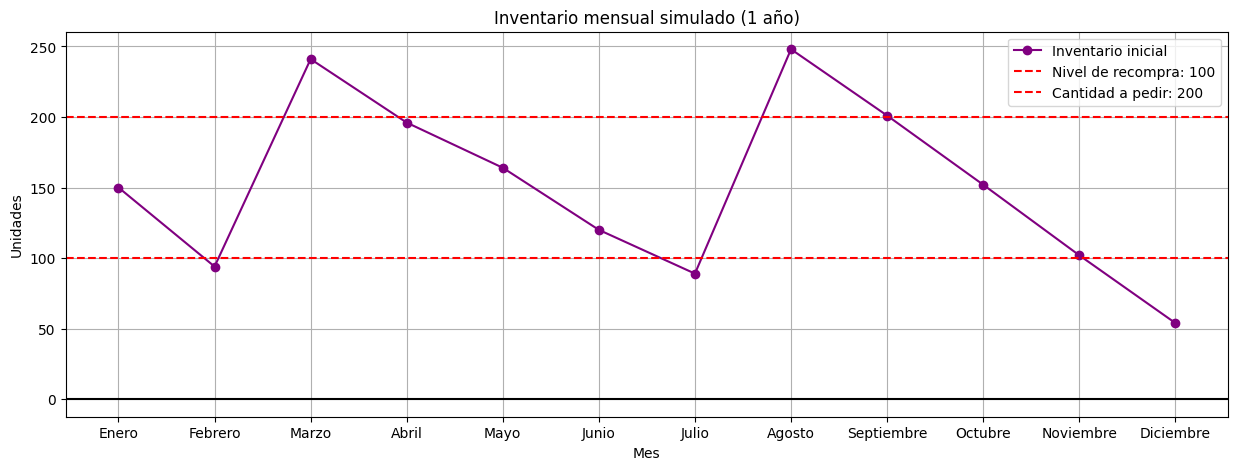

Costo por Ordenar: $300.00
Costo por Inventario: $2,541.67
Costo por Faltante: $1,000.00
Costo Total: $3,841.67


In [62]:
# Parámetros del sistema (R, q)

# Inventario inicial al comenzar el año
inventario_inicial_anual = 150
# Nivel de recompra: si el inventario cae por debajo de este valor, se realiza un pedido
nivel_reorden_R = 100
# Cantidad de unidades a pedir cada vez que se realiza una orden
cantidad_pedido_q = 200


# Simulación para 1 año
# Se ejecuta la simulación con los parámetros definidos
tabla_resultados, tabla_costos = simular_inventario(inventario_inicial_anual, nivel_reorden_R, cantidad_pedido_q, 1)
# Mostramos la tabla con resultados mensuales
display(tabla_resultados)


# Gráfico del comportamiento del inventario
plt.figure(figsize=(15, 5))
# Línea con el inventario inicial de cada mes
plt.plot(list(tabla_resultados["Inventario Inicial"]), marker="o", label="Inventario inicial", color="purple")
# Línea horizontal que indica el nivel de reorden R
plt.axhline(y=nivel_reorden_R, color="r", linestyle="--", label=f"Nivel de recompra: {nivel_reorden_R}")
# Línea horizontal que indica la cantidad de unidades que se piden al reordenar
plt.axhline(y=cantidad_pedido_q, color="r", linestyle="--", label=f"Cantidad a pedir: {cantidad_pedido_q}")
plt.axhline(y=0, color="k")


plt.xlabel("Mes")
plt.ylabel("Unidades")
plt.title("Inventario mensual simulado (1 año)")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(range(12), meses)

# Mostrar la gráfica
plt.show()

# ============================
# Desglose de costos
# ============================

# Se imprimen los costos obtenidos del único año simulado
print(f"Costo por Ordenar: ${tabla_costos['Costos por Orden'].mean():,.2f}")
print(f"Costo por Inventario: ${tabla_costos['Costos por Inventario'].mean():,.2f}")
print(f"Costo por Faltante: ${tabla_costos['Costos por Faltantes'].mean():,.2f}")
print(f"Costo Total: ${tabla_costos['Costos Totales'].mean():,.2f}")




>  Simulación estadística de Monte Carlo para estimar el costo total promedio anual de un sistema de inventarios y construir un intervalo de confianza del 95% sobre dicho costo.

1. Ejecuta 200 simulaciones del sistema de inventarios.

2. Calcula el costo total promedio anual de cada simulación.

3. Estima la media y el intervalo de confianza del CPT.

4. Grafica los resultados, incluyendo:

  * Línea de la media
  * Banda de confianza alrededor de la media

Tenemos que para el costo total promedio 5256.536494920865 tenemos un intervalo de confianza de [ 5223.720528091143 , 5223.720528091143 ]


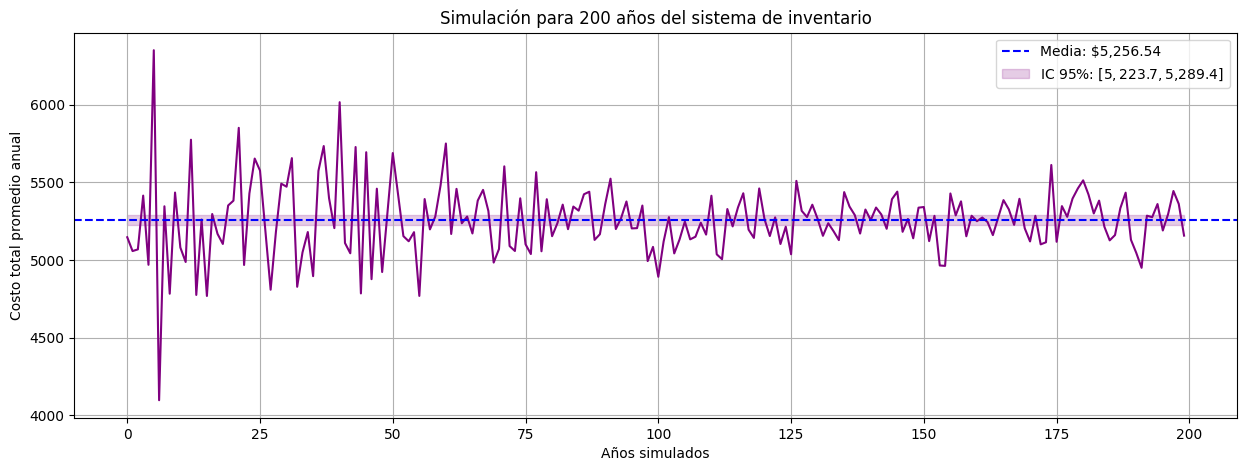

In [76]:
# Número de años que se simularán
num_simulaciones = 200

# Lista para guardar el costo total promedio anual de cada simulación
costos_promedios_anuales = []

# Simulamos el sistema de inventario durante varios años
for i in range(1, num_simulaciones + 1):
    _, tabla_costos = simular_inventario(inventario_inicial_anual,nivel_reorden_R,cantidad_pedido_q,i)
    # Se extrae el promedio del costo total (CPT) para esa ejecución
    costos_promedios_anuales.append(np.mean(tabla_costos["Costos Totales"]))


# Cálculo de estadísticas descriptivas
media_costo_total = np.mean(costos_promedios_anuales)                      # Promedio de CPT
desviacion_muestral = np.std(costos_promedios_anuales, ddof=1)            # Desviación estándar muestral
nivel_confianza = 0.95
alfa = 1 - nivel_confianza
grados_libertad = num_simulaciones - 2
valor_t = Tt.ppf(1 - alfa/2, df=grados_libertad)      # Valor crítico t de Student
error_estandar = valor_t * desviacion_muestral / np.sqrt(num_simulaciones)    # Error estándar del estimador

print("Tenemos que para el costo total promedio", media_costo_total, "tenemos un intervalo de confianza de [",
      media_costo_total - error_estandar,",",media_costo_total - error_estandar,"]")

# Gráfico del costo promedio total por año con intervalo de confianza
plt.figure(figsize=(15, 5))
plt.plot(costos_promedios_anuales, color = "purple")     # Línea con los costos promedio simulados año a año
plt.axhline(y=media_costo_total, color="blue", linestyle="--", label=f"Media: ${media_costo_total:,.2f}")   # Línea horizontal de la media del costo total

# Banda sombreada del intervalo de confianza al 95%
plt.fill_between(range(num_simulaciones),media_costo_total - error_estandar, media_costo_total + error_estandar,
                 color="purple", alpha=0.2,label=f"IC 95%: [${media_costo_total - error_estandar:,.1f}, ${media_costo_total + error_estandar:,.1f}]")
plt.xlabel("Años simulados")
plt.ylabel("Costo total promedio anual")
plt.title(f"Simulación para {num_simulaciones} años del sistema de inventario")
plt.legend(loc="best")
plt.grid(True)
plt.show()

---
# **Método de Hooke-Jeeaves**
---

**Método de Hooke-Jeeves aplicado al problema de inventarios**

El método de Hooke y Jeeves es un algoritmo de optimización sin derivadas que busca encontrar el mínimo (o máximo) de una función objetivo mediante dos mecanismos principales: búsqueda exploratoria y búsqueda por patrón

Este método es útil cuando:
  * La función objetivo no es analítica o es difícil de derivar.
  * Hay presencia de ruido estocástico (como en simulaciones).
  * No se pueden usar métodos clásicos de optimización con gradiente.

**Aplicación al modelo de inventario (R, q)**

En el contexto del sistema de inventarios, el objetivo es encontrar la mejor combinación de parámetros:
$$(R, q) \in \mathbb{N}^2$$
que minimicen el costo total promedio anual del sistema:

$$ \min_{(R, q)} \ \text{CPT}(R, q) $$

donde el Costo Total es una función estimada mediante simulación Monte Carlo, que considera:
  * Costos por ordenar (\$100 por pedido).
  * Costos por mantener inventario promedio.
  * Costos por faltantes de demanda insatisfecha.

**Pasos del algoritmo:**

  * Punto inicial: Se elige un punto de partida \($ x_0 = (R_0, q_0)$ \), por ejemplo \( $x_0 = (100, 200)$ \).
    
  * Búsqueda exploratoria: Se prueban variaciones alrededor del punto base en cada dirección de las variables. Si alguna mejora el valor de la función objetivo, se actualiza.
    
  * Búsqueda por patrón: Si se encuentra una mejora, se avanza siguiendo el patrón del desplazamiento anterior:
    $$ x_{\text{nuevo}} = 2x_{\text{actual}} - x_{\text{anterior}}$$
    
  * Reducción del paso} Si no se encuentra mejora, se reduce el tamaño del paso \( $\delta$ \) y se repite el proceso.
    
  * Condición de paro: El algoritmo se detiene cuando \( $\delta < \epsilon $\) (tolerancia) o se alcanza un número máximo de iteraciones.
---
**Ventajas**

   * No requiere derivadas de la función objetivo.
   * Funciona bien con funciones con ruido, como las estimadas por simulación.
   * Es fácil de implementar y ajustar para problemas con pocos parámetros.
---
***Conclusión***

El método de Hooke y Jeeves es adecuado para optimizar el sistema de inventarios, ya que permite encontrar la mejor política \($R^*, q^*$\) que minimiza el costo total promedio anual, a pesar de la aleatoriedad inherente del modelo.


In [79]:
# Función objetivo para el problema de inventario

# Esta función recibe una tupla (R, q) y devuelve el costo total promedio
# Tras simular 1000 años con inventario inicial de 150 unidades
def funcion_objetivo(par):
    nivel_reorden_R, cantidad_pedido_q = par
    _, tabla_costos = simular_inventario(
        anual_inventario_inicial=150,
        nivel_reorden_R=int(nivel_reorden_R),
        cantidad_pedido_q=int(cantidad_pedido_q),
        num_simulaciones=1000
    )
    return tabla_costos["Costos Totales"].mean()

# Método de Hooke y Jeeves para optimización sin gradientes
def hooke_jeeves(f, punto_inicial, delta=10.0, epsilon=1e-2, max_iter=1000):
    # Inicialización del punto base y del nuevo punto
    punto_base = punto_inicial[:]
    punto_nuevo = punto_inicial[:]
    num_variables = len(punto_inicial)
    iteracion = 0

    # Iteración principal: se repite mientras el paso sea mayor a epsilon
    while delta > epsilon and iteracion < max_iter:
        # Búsqueda exploratoria
        for i in range(num_variables):
            valor_temp = punto_nuevo[i]

            # Se intenta mover hacia adelante
            punto_nuevo[i] += delta
            if f(punto_nuevo) >= f(punto_base):
                # Si no mejora, se intenta hacia atrás
                punto_nuevo[i] = valor_temp - delta
                if f(punto_nuevo) >= f(punto_base):
                    # Si tampoco mejora hacia atrás, se regresa al valor original
                    punto_nuevo[i] = valor_temp


        # Evaluación del patrón
        if f(punto_nuevo) < f(punto_base):
            # Se forma un patrón de avance lineal
            punto_patron = [
                2 * punto_nuevo[i] - punto_base[i]
                for i in range(num_variables)
            ]

            # Si el punto patrón mejora, se adopta
            if f(punto_patron) < f(punto_nuevo):
                punto_base = punto_nuevo[:]
                punto_nuevo = punto_patron
            else:
                # Si no, se queda en el mejor punto hallado
                punto_base = punto_nuevo[:]
        else:
            # Si no hubo mejora, se reduce el tamaño del paso
            delta /= 2
            punto_nuevo = punto_base[:]

        iteracion += 1

    # Se retorna el mejor punto encontrado y su costo
    return [int(round(valor)) for valor in punto_base], f(punto_base)


In [81]:
# Optimización del sistema (R, q)

# Punto inicial para el algoritmo: [R inicial, q inicial] = [100, 200]
punto_inicial = [100, 200]

# Ejecutamos el método de Hooke-Jeeves con la función objetivo
mejor_punto, costo_minimo = hooke_jeeves(funcion_objetivo, punto_inicial)

# Se imprimen los resultados óptimos
print(f"Mejor nivel de recompra (R*): {mejor_punto[0]}")
print(f"Mejor cantidad a pedir (q*): {mejor_punto[1]}")
print(f"Costo total promedio mínimo: ${costo_minimo:,.1f}")

Mejor nivel de recompra (R*): 138
Mejor cantidad a pedir (q*): 228
Costo total promedio mínimo: $3,835.5




> **Evaluación del sistema con los valores óptimos encontrados**



,Mes,Inventario Inicial,Demanda Ajustada,Inventario Final,Faltantes,Órdenes realizadas,Inventario Promedio
0,Enero,150,58,92,0,1,121
1,Febrero,92,47,45,0,0,68
2,Marzo,45,50,0,5,0,20
3,Abril,0,46,0,46,0,0
4,Mayo,177,42,135,0,1,156
5,Junio,135,32,103,0,0,119
6,Julio,103,42,61,0,0,82
7,Agosto,289,41,248,0,0,268
8,Septiembre,248,50,198,0,0,223
9,Octubre,198,65,133,0,1,165


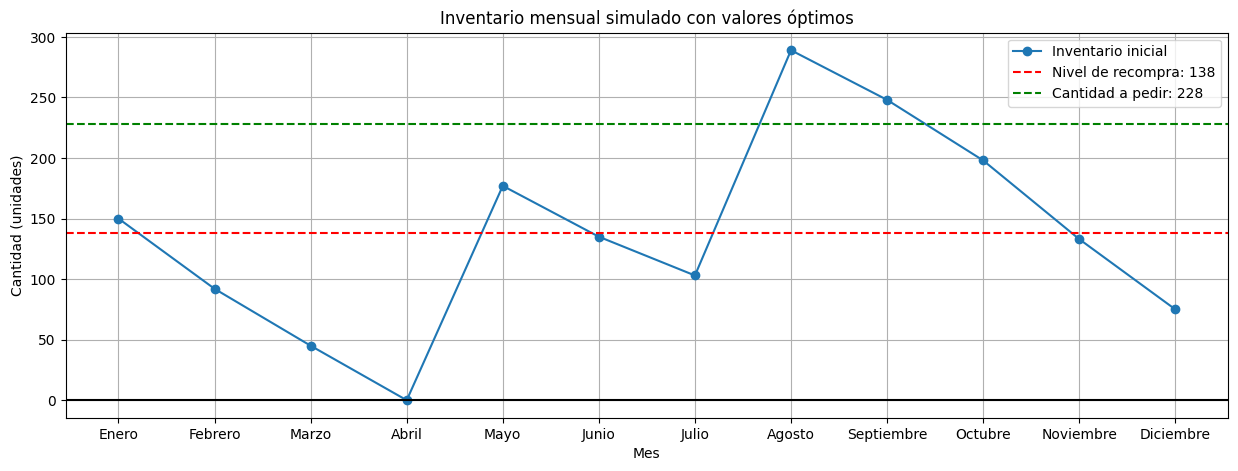

Costo por Ordenar: $300.00
Costo por Inventario: $2,281.67
Costo por Faltante: $2,550.00
Costo Total: $5,131.67


In [84]:
# Se asignan los valores óptimos obtenidos por Hooke-Jeeves
anual_inventario_inicial = 150
nivel_reorden_R = mejor_punto[0]        # Mejor R
cantidad_pedido_q = mejor_punto[1]      # Mejor q

# Simulación del inventario durante 1 año con los parámetros óptimos
tabla_resultados, tabla_costos = simular_inventario(
    anual_inventario_inicial,
    nivel_reorden_R,
    cantidad_pedido_q,
    num_simulaciones=1
)

# Mostrar la tabla con los resultados mensuales del primer año
from IPython.display import display
display(tabla_resultados)


# Gráfico del comportamiento del inventario
plt.figure(figsize=(15, 5))
plt.plot(list(tabla_resultados["Inventario Inicial"]), marker="o", label="Inventario inicial")
plt.axhline(y=nivel_reorden_R, color="r", linestyle="--", label=f"Nivel de recompra: {nivel_reorden_R}")
plt.axhline(y=cantidad_pedido_q, color="g", linestyle="--", label=f"Cantidad a pedir: {cantidad_pedido_q}")
plt.axhline(y=0, color="k")
plt.xlabel("Mes")
plt.ylabel("Cantidad (unidades)")
plt.title("Inventario mensual simulado con valores óptimos")
plt.legend(loc="best")
plt.grid(True)
plt.xticks(range(12), meses)
plt.show()


# Desglose de los costos

# Costos correspondientes al único año simulado con R* y q*
print(f"Costo por Ordenar: ${tabla_costos['Costos por Orden'].mean():,.2f}")
print(f"Costo por Inventario: ${tabla_costos['Costos por Inventario'].mean():,.2f}")
print(f"Costo por Faltante: ${tabla_costos['Costos por Faltantes'].mean():,.2f}")
print(f"Costo Total: ${tabla_costos['Costos Totales'].mean():,.2f}")

### **Simulación del sistema con parámetros óptimos durante 200 años para estimar intervalo de confianza del costo total promedio**

Tenemos que para el costo total promedio 3775.5148433084705 tenemos un intervalo de confianza de [ 3755.2380361457253 , 3755.2380361457253 ] 
 para una recompra de  138  unidades y compra de  228  unidades.


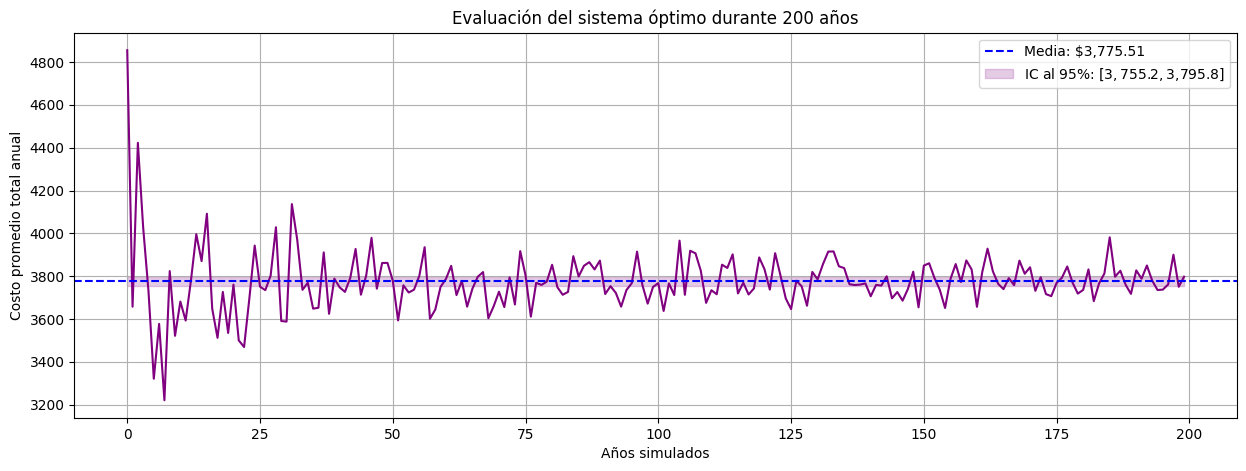

In [95]:
num_simulaciones = 200
costos_promedios_anuales = []

# Ejecutamos simulaciones con los mejores parámetros (R*, q*)
for i in range(1, num_simulaciones + 1):
    _, tabla_costos = simular_inventario(
        anual_inventario_inicial=150,
        nivel_reorden_R=nivel_reorden_R,
        cantidad_pedido_q=cantidad_pedido_q,
        num_simulaciones=i
    )
    # Se guarda el costo total promedio anual (CPT) de la simulación
    costos_promedios_anuales.append(np.mean(tabla_costos["Costos Totales"]))

# Cálculo de estadísticas de la muestra
media_costo_total = np.mean(costos_promedios_anuales)                      # Promedio de Costo Total
desviacion_muestral = np.std(costos_promedios_anuales, ddof=1)            # Desviación estándar muestral
nivel_confianza = 0.95
alfa = 1 - nivel_confianza
grados_libertad = num_simulaciones - 2
valor_t = Tt.ppf(1 - alfa/2, df=grados_libertad)      # Valor crítico t de Student
error_estandar = valor_t * desviacion_muestral / np.sqrt(num_simulaciones)    # Error estándar del estimador

print("Tenemos que para el costo total promedio", media_costo_total, "tenemos un intervalo de confianza de [",
      media_costo_total - error_estandar,",",media_costo_total - error_estandar,"] \n para una recompra de ",
      nivel_reorden_R, " unidades y compra de ", cantidad_pedido_q, " unidades.")

plt.figure(figsize=(15, 5))
plt.plot(costos_promedios_anuales, color="purple")
plt.axhline(y=media_costo_total, color="blue", linestyle="--", label=f"Media: ${media_costo_total:,.2f}")
plt.fill_between(
    range(num_simulaciones),
    media_costo_total - error_estandar,
    media_costo_total + error_estandar,
    color="purple",
    alpha=0.2,
    label=f"IC al {(1-alfa)*100:.0f}%: [${media_costo_total - error_estandar:,.1f}, ${media_costo_total + error_estandar:,.1f}]"
)
plt.xlabel("Años simulados")
plt.ylabel("Costo promedio total anual")
plt.title(f"Evaluación del sistema óptimo durante {num_simulaciones} años")
plt.legend(loc="best")
plt.grid(True)
plt.show()